In [1]:
# Premier Essai - Signaux sinusoidaux
#   signaux à 2 fréquences différentes - 10 et 20 Hz
#   signaux échantillonnés à Fe = 5000 Hz - sur 4000 points - amplitude 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

debug_aff = 1

Essai sur sinus
(2000, 1)
Affichage sinus test


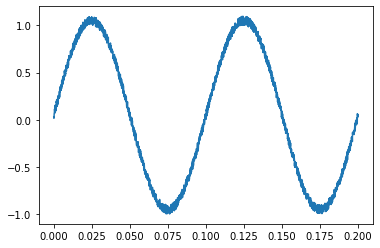

In [2]:
## Generation des signaux sinusoïdaux
#   @freq : frequence du signal
#   @amplitude : amplitude du signal
#   @Fe : frequence d'echantillonnage
#   @N_points : nombre de points à générer
#   @bruit : pourcentage de bruit dans le signal
def generate_sinus(freq, amplitude, Fe, N_points, bruit = 0.1, phase = 0):
    temps = np.linspace(0, N_points*1/Fe, N_points)
    noise_sig = bruit*np.random.rand(len(temps))
    signal = amplitude * np.sin(2 * np.pi * freq * temps + phase) + noise_sig
    return (temps, signal)

## Test sinus
if debug_aff == 1:
    print('Essai sur sinus')
    (t, sig) = generate_sinus(10, 1, 10000, 2000)
    sig = sig.reshape(2000, 1)
    print(sig.shape)
    print('Affichage sinus test')
    plt.figure()
    plt.plot(t, sig)
    plt.show()


!! DATASET !!


100%|██████████| 100/100 [00:00<00:00, 8305.55it/s]

Shape of dataset
(1000, 2000, 1)
Shape of y_train
(1000,)
Affichage sinus 1


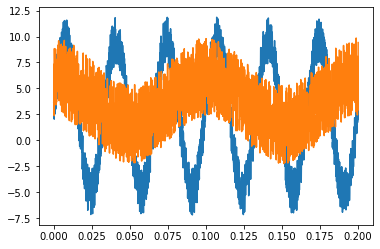

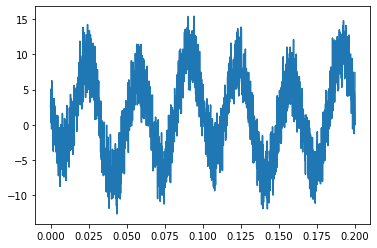

In [3]:
## Generation du dataset d'entrainement
#   Generation des signaux

def generate_dataset(npoints, nb_echantillons):
    amp = 1
    fe = 10000
    X_signaux = np.empty([nb_echantillons, npoints, 1], dtype = float)
    y_signaux = np.empty([nb_echantillons], dtype = int)

    for ik in tqdm(range(nb_echantillons)):
        freq_choice = np.random.rand(1)
        amp = 10.0 * np.random.rand(1)
        nois = 8.0 * np.random.rand(1)
        phas = np.pi * np.random.rand(1)
        if freq_choice >= 0.67:
            freq = 10
            y_signaux[ik] = 0
        elif freq_choice >= 0.33:
            freq = 20
            y_signaux[ik] = 1
        else:
            freq = 30
            y_signaux[ik] = 2
        (t, sig) = generate_sinus(freq, amp, fe, npoints, bruit=nois, phase=phas)
        sig = sig.reshape(len(t),1)
        X_signaux[ik,:] = sig

    return (t, X_signaux, y_signaux)

## Dataset generation
print('!! DATASET !!')
nbpoints = 2000
nbech_train = 1000
nbech_test = 100
(t, train_data, y_train) = generate_dataset(nbpoints, nbech_train)
(t, test_data, y_test) = generate_dataset(nbpoints, nbech_test)
print('Shape of dataset')
print(train_data.shape)
print('Shape of y_train')
print(y_train.shape)

if debug_aff == 1:
    print('Affichage sinus 1')
    plt.figure()
    plt.plot(t, train_data[5,:])
    plt.plot(t, train_data[6,:])
    plt.show()
    plt.figure()
    diff_data = train_data[6,:] - train_data[5,:]
    plt.plot(t, diff_data)
    plt.show()

In [4]:
## Tensorflow setup and training
print('Tensorflow')
# Model setup
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(nbpoints,1)))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))      # couche intermédiaire
model.add(tf.keras.layers.Dense(8, activation=tf.nn.tanh))      # couche intermédiaire
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))    # taille de sortie

# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

print('Data shape')
print(train_data.shape)
print(y_train.shape)

# data normalization
max_data = train_data.max()
print('Max = '+str(max_data))
train_data = train_data / max_data
test_data = test_data / max_data

Tensorflow
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                64032     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 64,323
Trainable params: 64,323
Non-trainable params: 0
_________________________________________________________________
Data shape
(1000, 2000, 1)
(1000,)
Max = 17.470223947567113


2022-04-20 21:01:26.890152: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-04-20 21:01:29.608021: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 21:01:29.608672: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996250000 Hz


Epoch 1/20
20/20 [==============================] - 1s 21ms/step - loss: 0.5961 - accuracy: 0.8610 - val_loss: 0.2906 - val_accuracy: 0.9700
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2502 - accuracy: 0.9851 - val_loss: 0.2249 - val_accuracy: 0.9700
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.2052 - accuracy: 0.9862 - val_loss: 0.1820 - val_accuracy: 0.9700
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9900 - val_loss: 0.1515 - val_accuracy: 0.9800
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.1238 - accuracy: 0.9981 - val_loss: 0.1343 - val_accuracy: 0.9800
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9999 - val_loss: 0.1212 - val_accuracy: 0.9800
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 1.0000 - val_loss: 0.1063 - val_accuracy: 0.9800
Epoch 8/20
20/20 [=

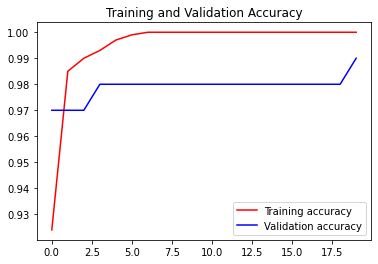

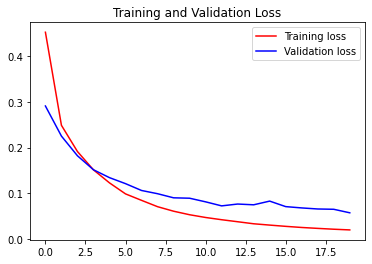

100%|██████████| 30/30 [00:00<00:00, 8568.55it/s]

Prediction par le modele
[0 1 2 0 2 2 0 1 1 1 0 1 0 2 0 0 2 2 1 2 0 2 1 0 0 1 0 1 2 2]
Vraies valeurs
[0 1 2 0 2 2 0 1 1 1 0 1 0 2 0 0 2 2 1 2 0 2 1 0 0 1 0 1 2 2]


In [5]:
# First Training
n_epoch = 20
history = model.fit(train_data, y_train, epochs=n_epoch, steps_per_epoch=20, validation_data=(test_data, y_test))
# avec verication sur données test

# Display of accuracy of the model in function of the epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.show()

## Signal prediction with trained model
(t, predic, y_predic) = generate_dataset(nbpoints, 30)
y_proba = model.predict(predic)
y_pred = y_proba.argmax(axis=1)   # pour obtenir l'indice de la case max
print('Prediction par le modele')
print(y_pred)
print('Vraies valeurs')
print(y_predic)